# Comedy Bang Bang Podcast Best Of - Decision Tree Model

In [105]:
# Define some exclusions for PEP8 that don't apply when the Jupyter Notebook
#   is exported to .py file
# pylint: disable=pointless-statement
# pylint: disable=fixme
# pylint: disable=expression-not-assigned
# pylint: disable=missing-module-docstring
# pylint: disable=invalid-name

import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Setting custom parameters for this model

In [106]:
# percentage of training data to use for test
TEST_SIZE = 0.33

# random seed
RANDOM_STATE = 1234

LABEL_COLUMN_NAME = 'label'

In [107]:
filename = os.path.join(os.getcwd(), "data",
                "Comedy_bang_bang_podcast_dataset - full_dataset-v16_train.csv")
df = pd.read_csv(filename, header=0)

df.head()

,duration_in_minutes_winsorized_normalized,hundo,month_published_int_winsorized_normalized,num_actors,num_chars,label
0,0.000000,False,0.000000,3,2,True
1,0.024390,False,0.000000,3,1,False
2,0.012195,False,0.000000,3,0,False
3,0.000000,False,0.000000,5,0,False
4,0.060976,False,0.090909,3,1,False


In [108]:
# df.dtypes is a Pandas.Series
df.dtypes

# verify that there are only numeric and boolean datatypes left
# there should not be any strings left
for index, value in df.dtypes.items():
    assert value in ['float64', 'bool', 'int64'], f'Column name {index} is not numeric or boolean- found {value}. All features at this point should be numeric or boolean. Exiting.'

print("Feature datatype check passed.")

Feature datatype check passed.


# Check that the data does not contain any missing values.
The absense of missing values is necessary for training a Decision Tree model.

In [109]:
# get a Panda Series of the columns and number of NaNs in each one
nan_count = np.sum(df.isnull(), axis = 0)

# iterate through the Series. It could be easier to just throw and exception if
# any have a value of zero.
for index, value in nan_count.items():
    assert value == 0, f'Column name {df.columns[index]} (index = {index}) has {value} missing values (NaN). Decision trees cannot have any missing values. Exiting.'

# Split up the data

In [110]:
y = df[LABEL_COLUMN_NAME]
X = df.drop(columns = LABEL_COLUMN_NAME, axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE,
                                                    random_state=RANDOM_STATE)

# Define a function that builds a model given hyperparameters

In [111]:
def train_test_DT(X_train1, X_test1, y_train1, y_test1, leaf1, depth1,
                  crit='entropy'):
    '''
    Fit a Decision Tree classifier to the training data X_train, y_train.
    Return the accuracy of resulting predictions on the test set.
    Parameters:
        leaf := The minimum number of samples required to be at a leaf node
        depth := The maximum depth of the tree
        crit := The function to be used to measure the quality of a split.

                Default: gini.
    '''
    # Instantiate the  Scikit-learn DecisionTreeClassifier model object
    # with specific hyperparameters
    model = DecisionTreeClassifier(max_depth=depth1, min_samples_leaf=leaf1,
                                   criterion=crit)

    # Fit the model to the training data below
    model.fit(X_train1, y_train1)

    # Make predictions on the test data and store the results
    class_label_predictions = model.predict(X_test1)

    # Compute the accuracy
    acc_score = accuracy_score(y_test1, class_label_predictions)

    return acc_score

# Train on different hyperparameter values

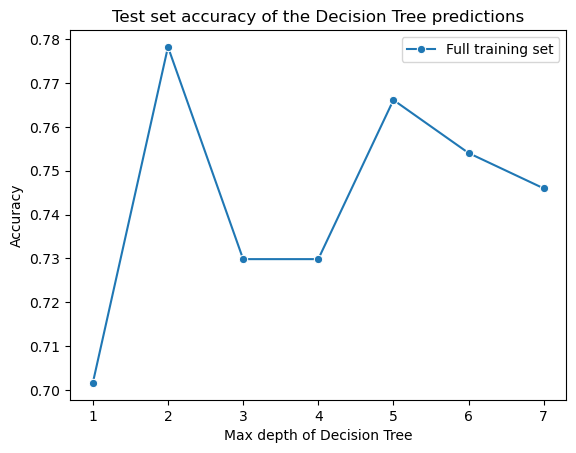

In [112]:
# initialize an empty list to store results
acc = []

# specify the min number of samples to create a leaf as 1 for this
# first iteration
leaf = 1

# original search range, much broader:
# max_depth_range = [2**i for i in range(6)]

# second search range, zooming in on near the broad maximum found
# in the first run:
max_depth_range = range(1,8)

# iterate on the list of max depths
for md in max_depth_range:

    # train the model and store the accuracy
    score = train_test_DT(X_train, X_test, y_train, y_test, leaf, md)
    # print(f'Max Depth= {md} accuracy score: {score}')

    # add the results to the list for future plotting
    acc.append(float(score))

fig = plt.figure()
ax = fig.add_subplot(111)
p = sns.lineplot(x=max_depth_range, y=acc, marker='o',
                 label = 'Full training set')

plt.title('Test set accuracy of the Decision Tree predictions')
ax.set_xlabel('Max depth of Decision Tree')
ax.set_ylabel('Accuracy')
plt.show()

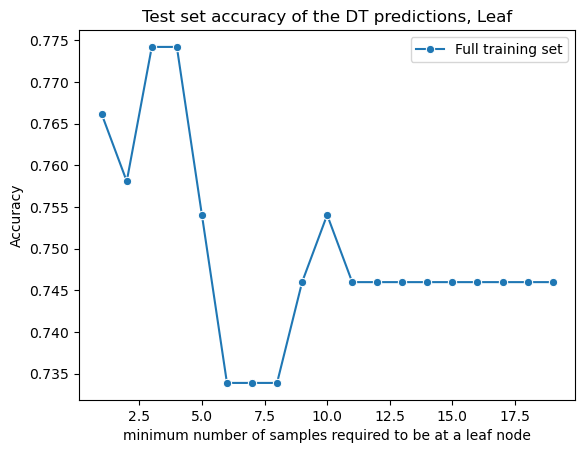

In [113]:
# best max depth value found in previous run:
OPTIMUM_MAX_DEPTH = 5

# re-initialize the output array to avoid reusing old results,

# also to save memory and avoid creating a new variable
acc = []

# original test to look for local maximum broadly
# leaf_range = [2**i for i in range(8)]

# new range to local specific max:
leaf_range = range(1,20,1)

# iterate through list of potential leaf values
for leaf in leaf_range:
    score = train_test_DT(X_train, X_test, y_train, y_test, leaf,
                          OPTIMUM_MAX_DEPTH)
    # print(f'Leaf = {leaf}, accuracy score: {score}')
    acc.append(float(score))

fig = plt.figure()
ax = fig.add_subplot(111)
p = sns.lineplot(x=leaf_range, y=acc, marker='o', label = 'Full training set')

plt.title('Test set accuracy of the DT predictions, Leaf')
ax.set_xlabel('minimum number of samples required to be at a leaf node')
ax.set_ylabel('Accuracy')
plt.show()

OPTIMUM_LEAF = 4

# Run the final model

In [114]:
# run the final model that uses both of the optimum values:
score = train_test_DT(X_train, X_test, y_train, y_test, OPTIMUM_LEAF,
                      OPTIMUM_MAX_DEPTH)
print(f'Maximum accuracy score: {score:.4}')

Maximum accuracy score: 0.7742
